# [CS114.N21 - Nopen] NOTEBOOK: RECOGNIZING HAND-WRITTEN DIGITS

Lấy code và tham khảo từ:
<br>https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
<br>https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
<br>https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3
<br>https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
<br>https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

- Thực hiện: Nhóm Nopen
- Thành viên:
  - Vũ Anh Đức (19521384)
  - Châu Thiên Long (21520331)
  - Tăng Minh Hiển (21520229)
  - Nguyễn Thái Thành Long (21520334)

#Link github các nhóm lấy dữ liệu:
https://github.com/dnsang1611/CS114.N21-KHNT.git
<br>https://github.com/phongidoit/CS114.git
<br>https://github.com/kiendoo4/hand_written_digits.git
<br>https://github.com/Tlon9/CS114.git
<br>https://github.com/TruongNoDame/Create-handwriting.git
<br>https://github.com/HungStark/handwritten_digits.git
<br>https://github.com/ngcthc/CS114-ML-Public.git
<br>https://github.com/thuynguyen2003/CS114-MachineLearning.git
<br>https://github.com/npk7264/hand-written-digits.git
<br>https://github.com/KiRzEa/CS114.git
<br>https://github.com/phamthanhlam0201/Hand_written_degits.git
<br>https://github.com/khanh232002/hand-written-digits.git
<br>https://github.com/Sang-UIT/CS114.git
<br>https://github.com/uyenbhku/handwritten_digits.git

#1 Thư viện

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets, svm, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
from PIL import Image, ImageOps
import numpy as np

#2 Dataset Handwritten Digits Recognizition từ thư viện sklearn

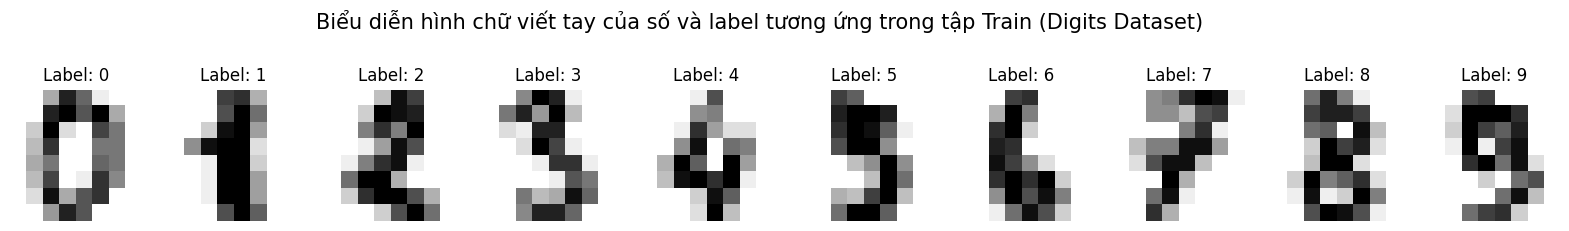

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

_.suptitle("Biểu diễn hình chữ viết tay của số và label tương ứng trong tập Train (Digits Dataset)", fontsize=15)
plt.show()

In [ ]:
# Print the shape of the images and data keys
print("Shape of images in dataset:", digits.images.shape)
print("Shape of data in dataset:",digits.data.shape)
print("\nThống kê số lượng chữ viết tay của từng số trong Training Dataset")
for i in range (0,10):
  print(f"Số {i}:",np.count_nonzero(digits.target == i))

Shape of images in dataset: (1797, 8, 8)
Shape of data in dataset: (1797, 64)

Thống kê số lượng chữ viết tay của từng số trong Training Dataset
Số 1: 182
Số 2: 177
Số 3: 183
Số 4: 181
Số 5: 182
Số 6: 181
Số 7: 179
Số 8: 174
Số 9: 180


# 3 Kết nối Google Collab lấy dữ liệu Test của lớp thu thập

In [ ]:
#Get the Test Data from Google Drive Folder
drive.mount('/content/drive')
test_folder = '/content/drive/MyDrive/CS114 /Handwritten_Digits_Recognizition/class_dataset'
#test_folder = '/content/drive/MyDrive/CS114 /Handwritten_Digits_Recognizition/class_dataset'

Mounted at /content/drive


#4 Mô tả DATASET
- Dataset phục vụ cho bài tập này gồm 1517 mẫu Chữ số viết tay được thu thập bằng từ các nhóm đang học tập môn Máy học lớp CS114.N21. Mỗi nhóm trong lớp gồm 3-4 thành viên.
- Chi tiết cách dữ liệu được thu thập
  + Các nhóm đều thực hiện việc thu thập dữ liệu.  
  + Mỗi thành viên trong nhóm chụp hình (bằng webcam máy tính/camera điện thoại) các mẫu viết tay các chữ số từ 0 đến 9. Mỗi thành viên được giao nhiệm vụ viết 3 mẫu khác nhau của cùng một chữ số và phải viết đủ các mẫu của 10 chữ số.
  + Mỗi chữ số được viết rõ ràng trên 1 tờ giấy (giấy A4/mảnh giấy nhỏ) không chứa thông tin khác ngoài chữ số trong khoảng 1 đến 9 và một mẫu chỉ chứa thông tin của một chữ số được viết bằng bút.
  + Ảnh sẽ phải giữ nguyên kích cỡ, không dùng qua filter hoặc qua bước chỉnh sửa trung gian trước khi đưa vào thực hành.
  + Không có giới hạn về loại bút, màu bút, màu giấy, kích cỡ giấy trong việc thu thập dữ liệu.
  + Các chữ số được viết chỉ cần nằm trong khung hình của mẫu, không yêu cầu bắt buộc về tỉ lệ, độ lớn của chữ số.
- Nhóm đã lấy dữ liệu chụp ảnh từ 16 nhóm gồm: 2Q2T, DuongGiaARap, GNT, H20, HKV, HNNT, KHNT, Minions, NSFW, Nhom8, Nopen, PHVT, PKLD, TKN, Threesome, fusionist.  

## Tiền xử lý ảnh chụp chữ số viết tay

Nhóm đã tham khảo và lấy code từ
- "Image Thresholding" (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
- "Smoothing Images" (https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
- "Color Space Conversions" (https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

Nhóm đã thử cách tiền xử lý ảnh lần lượt các bước:
- Đưa ảnh màu về ảnh grayscale (dùng tham số cv2.COLOR_RGB2GRAY)
- Dùng filter Guassian, là một phương pháp loại bỏ phần nhiễu, làm mờ hình ảnh, dùng để loại bỏ phần "noise" và "edge" trong ảnh (Image Blurring (Image Smoothing)).
- Áp dụng thresholding kết hợp với Otsu's Binarization, đây là phương pháp tìm ra ngưỡng tối ưu cho ảnh. Ngưỡng này được áp dụng trong thresholding khi pixel bé hơn ngưỡng này thì sẽ chuyển về 0 và ngược lại thì được đưa về giá trị tối đa được quy định trong thresholding (nhóm dùng giá trị tối đa là 255).
- Resize ảnh về 16x16 pixel

In [ ]:
#Return array contain pixel of image after applying greyscale, threshold and resize
def pre_processing (img):
  # Convert raw image to greyscale image,convert between RGB/BGR and grayscale, color conversions
  image = cv2.cvtColor (img,cv2.COLOR_RGB2GRAY)

  # Apply threshhode to image
  # Apply Guassian's filtering
  blur = cv2.GaussianBlur(image,(9,9),0)
  # Otsu's thresholding
  im,thre = cv2.threshold (blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  #Resize image into 16x16 pixel image
  image = cv2.resize (thre,(16,16), interpolation = cv2.INTER_AREA)
  return np.concatenate (image)

## Thực hiện Load dataset và tiền xử lý ảnh

In [ ]:
#Load Data from Dataset stored in Google Drive of Nopen Group
data_img = []
target_img = []

for dir1 in os.listdir(test_folder):
    for dir2 in os.listdir(os.path.join(test_folder,dir1)):
        for file in os.listdir(os.path.join(test_folder,dir1,dir2)):
            #Get the path and label of image
            image_path= os.path.join(test_folder, dir1,dir2,file)
            image_label = dir2

            #Preprocessing image
            image = cv2.imread(image_path)
            image = pre_processing (image)

            #Store data into array
            data_img.append(image)
            target_img.append(int(image_label))

data_img = np.array (data_img)
target_img = np.array (target_img)

## Thống kê số lượng mẫu của từng chữ số trong Dataset

In [ ]:
count = []
print("Tổng số lượng dữ liệu trong tập Dataset:", target_img.shape[0])
print("\nThống kê số lượng chữ viết tay của từng số trong Dataset")
for i in range (0,10):
  temp = np.count_nonzero(target_img == i)
  count.append (temp)
  print(f"Số {i}:",temp)

Tổng số lượng dữ liệu trong tập Dataset: 1513

Thống kê số lượng chữ viết tay của từng số trong Dataset
Số 0: 152
Số 1: 152
Số 2: 151
Số 3: 151
Số 4: 151
Số 5: 151
Số 6: 151
Số 7: 151
Số 8: 152
Số 9: 151


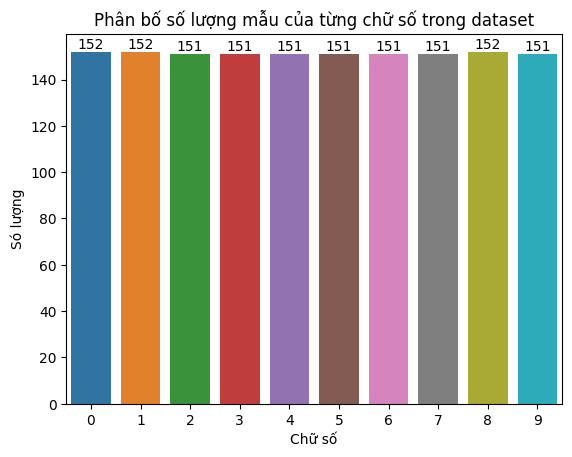

In [ ]:
label_name = np.unique (target_img)

ax = sns.barplot (x=label_name,y=count,errwidth=0)
ax.bar_label(ax.containers[0])

plt.title ("Phân bố số lượng mẫu của từng chữ số trong dataset")
plt.xlabel('Chữ số')
plt.ylabel('Só lượng');
plt.show()

## Biểu diễn hình chữ viết tay của số và label tương ứng trong Dataset

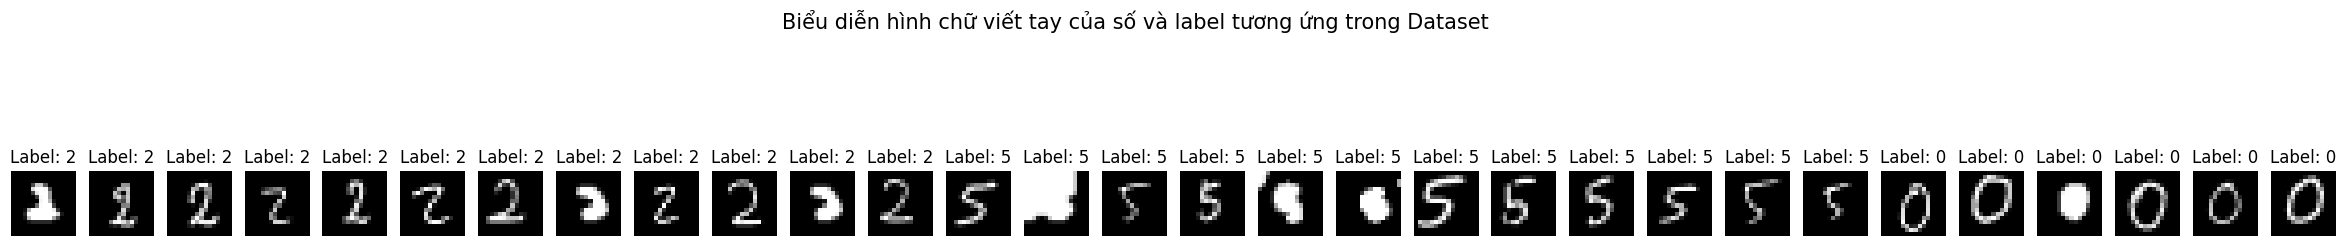

In [ ]:
#Visualize data
_, axes = plt.subplots(nrows=1, ncols=30, figsize=(30, 4))

for ax, image, label in zip(axes, data_img, target_img):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

_.suptitle("Biểu diễn hình chữ viết tay của số và label tương ứng trong Dataset", fontsize=15)
plt.show()

#5 Train mô hình với dữ liệu của lớp bằng thuật toán SVM và Decision Tree

## Phân chia Dataset thành 2 tập Train và Test

In [ ]:
# flatten the images in Train Dataset
'''n_train_samples = len(digits.images)
data = digits.images.reshape((n_train_samples, -1))

# flatten the images in Test Dataset
n_test_samples = len(target_img)
test_data = test_img.reshape((n_test_samples, -1))'''

X_train, X_test, y_train, y_test = train_test_split(
    data_img, target_img, test_size=0.2, shuffle=True, random_state=42
)

X_train = np.reshape(X_train,(len(X_train),-1))
X_test = np.reshape(X_test,(len(X_test),-1))
y_train = np.reshape(y_train,(len(y_train),-1))
y_test = np.reshape(y_test,(len(y_test),-1))


print ("Kích cỡ của tập Train:", X_train.shape[0])
print ("Kích cỡ của tập Test:",X_test.shape[0])

Kích cỡ của tập Train: 1210
Kích cỡ của tập Test: 303


##Kiểm tra một số mẫu trong tập train

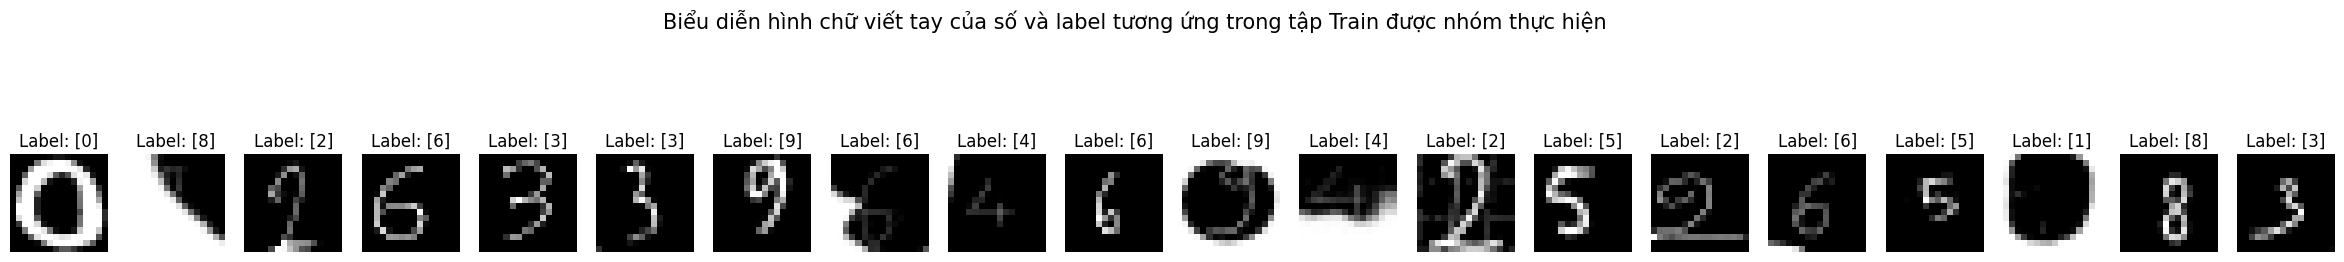

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(30, 4))

for ax, image, label in zip(axes, X_train[:20], y_train[:20]):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

_.suptitle("Biểu diễn hình chữ viết tay của số và label tương ứng trong tập Train được nhóm thực hiện", fontsize=15)
plt.show()

In [ ]:
count = []
print("Tổng số lượng dữ liệu trong tập Train:", y_train.shape[0])
print("\nThống kê số lượng chữ viết tay của từng số trong tập train")
for i in range (0,10):
  temp = np.count_nonzero(y_train == i)
  count.append (temp)
  print(f"Số {i}:",temp)

Tổng số lượng dữ liệu trong tập Train: 1210

Thống kê số lượng chữ viết tay của từng số trong tập train
Số 0: 117
Số 1: 126
Số 2: 120
Số 3: 118
Số 4: 124
Số 5: 115
Số 6: 121
Số 7: 124
Số 8: 121
Số 9: 124


##Train mô hình bằng thuật toán Decision Tree

In [ ]:
clf1 = DecisionTreeClassifier (random_state=42)
clf1.fit (X_train,y_train)

predicted1 = clf1.predict(X_test)

print(
    f"Classification report for classifier {clf1}:\n"
    f"{metrics.classification_report(y_test, predicted1)}\n"
)

Classification report for classifier DecisionTreeClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.46      0.50      0.48        26
           2       0.48      0.52      0.50        31
           3       0.56      0.45      0.50        33
           4       0.23      0.33      0.27        27
           5       0.45      0.42      0.43        36
           6       0.46      0.37      0.41        30
           7       0.25      0.37      0.30        27
           8       0.48      0.42      0.45        31
           9       0.41      0.33      0.37        27

    accuracy                           0.44       303
   macro avg       0.45      0.43      0.44       303
weighted avg       0.46      0.44      0.44       303




Ta thấy: Mức độ phân loại của mô hình đã tốt hơn mô hình phía trước, với mức accuracy_score cao hơn (0.44). Precision đạt mức trung bình khá ở label 0 (0.7), 3 (0.56), 2 (0.48). Recall cũng đạt mức trung bình ở label 0 (0.6), 1 (0.5), 2 (0.52). Mô hình vẫn cần được cải thiện thêm vì phân loại ở các label 4, 7, 9 vẫn còn thấp.

## Train mô hình bằng thuật toán SVM

In [ ]:
y_train2 = y_train.ravel()
y_test2 = y_test.ravel()
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train,y_train2)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.09      1.00      0.16        26
           2       1.00      0.03      0.06        31
           3       0.00      0.00      0.00        33
           4       1.00      0.04      0.07        27
           5       0.00      0.00      0.00        36
           6       1.00      0.03      0.06        30
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        27

    accuracy                           0.10       303
   macro avg       0.31      0.11      0.04       303
weighted avg       0.30      0.10      0.03       303




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nhận thấy: Mô hình dùng SVM cho kết quả tệ (accuracy ~ 0.10) và các precision, recall của 1 số label = 0. Vì thế, thực hiện tinh chỉnh mô hình hyper-parameter để mô hình chạy tốt hơn.

Tinh chỉnh: C = 3.0 và chuyển kernel = 'linear'

In [ ]:
#Tinh chỉnh C = 3.0, kernel = 'linear'
y_train2 = y_train.ravel()
y_test2 = y_test.ravel()
clf = svm.SVC(C = 3.0, gamma=0.001,kernel='linear',random_state=42)

# Learn the digits on the train subset
clf.fit(X_train,y_train2)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=3.0, gamma=0.001, kernel='linear', random_state=42):
              precision    recall  f1-score   support

           0       0.34      0.34      0.34        35
           1       0.24      0.38      0.29        26
           2       0.42      0.48      0.45        31
           3       0.44      0.36      0.40        33
           4       0.50      0.48      0.49        27
           5       0.44      0.31      0.36        36
           6       0.47      0.47      0.47        30
           7       0.40      0.44      0.42        27
           8       0.41      0.29      0.34        31
           9       0.23      0.26      0.25        27

    accuracy                           0.38       303
   macro avg       0.39      0.38      0.38       303
weighted avg       0.39      0.38      0.38       303




Tinh chỉnh mô hình với siêu tham số: kernel = 'poly' với degree = 5

In [ ]:
# Create a classifier: a support vector classifier
y_train2 = y_train.ravel()
y_test2 = y_test.ravel()
clf2 = svm.SVC(gamma=0.001,random_state=42,kernel='poly',C=3.0,degree=5)

# Learn the digits on the train subset
clf2.fit(X_train,y_train2)

# Predict the value of the digit on the test subset
predicted2 = clf2.predict(X_test)

print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test2, predicted2)}\n"
)

Classification report for classifier SVC(C=3.0, degree=5, gamma=0.001, kernel='poly', random_state=42):
              precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.38      0.42      0.40        26
           2       0.55      0.58      0.56        31
           3       0.46      0.48      0.47        33
           4       0.56      0.52      0.54        27
           5       0.48      0.42      0.45        36
           6       0.56      0.60      0.58        30
           7       0.57      0.63      0.60        27
           8       0.50      0.39      0.44        31
           9       0.29      0.30      0.29        27

    accuracy                           0.49       303
   macro avg       0.49      0.49      0.49       303
weighted avg       0.49      0.49      0.49       303




Ta thấy: Mô hình cho độ chính xác cho phân loại chữ viết tay đạt 0.49, tốt hơn mô hình SVM phía trên và cho độ chính xác cao hơn mô hình Decision Tree phía trên. Chỉ số F1 ở nhiều label đạt từ 0.4 đến 0.5, cho thấy mức độ phân loại của label mức trung bình. Mặc dù, vẫn còn hạn chế ở các label như 1 hay 9

#6 Đánh giá mô hình

## Classification Report

In [ ]:
print(
    f"Classification report for classifier {clf1}:\n"
    f"{metrics.classification_report(y_test, predicted1)}\n"
)

Classification report for classifier DecisionTreeClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.46      0.50      0.48        26
           2       0.48      0.52      0.50        31
           3       0.56      0.45      0.50        33
           4       0.23      0.33      0.27        27
           5       0.45      0.42      0.43        36
           6       0.46      0.37      0.41        30
           7       0.25      0.37      0.30        27
           8       0.48      0.42      0.45        31
           9       0.41      0.33      0.37        27

    accuracy                           0.44       303
   macro avg       0.45      0.43      0.44       303
weighted avg       0.46      0.44      0.44       303




In [ ]:
print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test2, predicted2)}\n"
)

Classification report for classifier SVC(C=3.0, degree=5, gamma=0.001, kernel='poly', random_state=42):
              precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.38      0.42      0.40        26
           2       0.55      0.58      0.56        31
           3       0.46      0.48      0.47        33
           4       0.56      0.52      0.54        27
           5       0.48      0.42      0.45        36
           6       0.56      0.60      0.58        30
           7       0.57      0.63      0.60        27
           8       0.50      0.39      0.44        31
           9       0.29      0.30      0.29        27

    accuracy                           0.49       303
   macro avg       0.49      0.49      0.49       303
weighted avg       0.49      0.49      0.49       303




## Confusion Matrix

Confusion matrix of Decision Tree:
[[21  1  2  1  3  0  1  5  1  0]
 [ 2 13  1  1  2  1  0  4  2  0]
 [ 0  3 16  0  2  1  1  5  1  2]
 [ 0  1  4 15  3  3  0  2  1  4]
 [ 1  2  2  2  9  4  3  1  3  0]
 [ 2  2  0  2  2 15  5  4  1  3]
 [ 2  0  1  1  5  4 11  4  1  1]
 [ 0  0  5  2  4  0  1 10  3  2]
 [ 1  4  0  2  4  1  1  4 13  1]
 [ 1  2  2  1  5  4  1  1  1  9]]



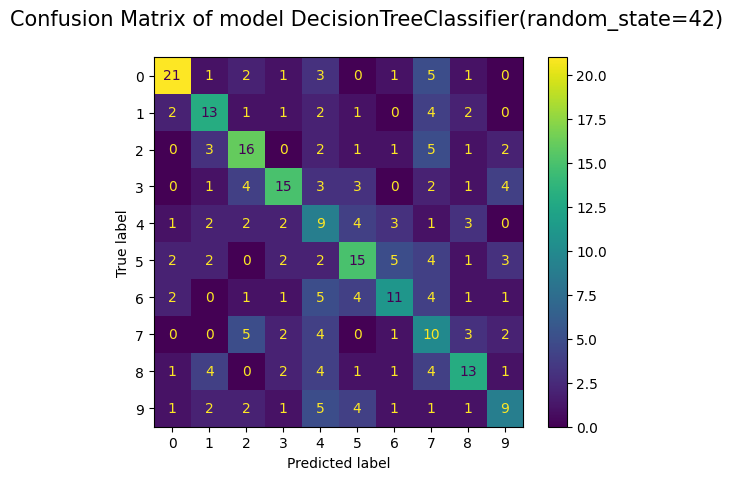

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted1)
disp.figure_.suptitle(f"Confusion Matrix of model {clf1}",fontsize = 15)
print(f"Confusion matrix of Decision Tree:\n{disp.confusion_matrix}\n")

plt.grid(False)
plt.show()

Confusion matrix of SVM:
[[19  3  3  1  1  1  1  3  0  3]
 [ 2 11  1  1  1  2  2  1  1  4]
 [ 3  2 18  1  1  1  0  0  2  3]
 [ 0  2  1 16  2  3  0  1  5  3]
 [ 0  1  2  3 14  0  4  2  0  1]
 [ 5  4  1  0  2 15  6  1  0  2]
 [ 4  2  2  0  2  2 18  0  0  0]
 [ 1  0  1  1  0  1  1 17  2  3]
 [ 1  2  2  6  0  4  0  3 12  1]
 [ 1  2  2  6  2  2  0  2  2  8]]



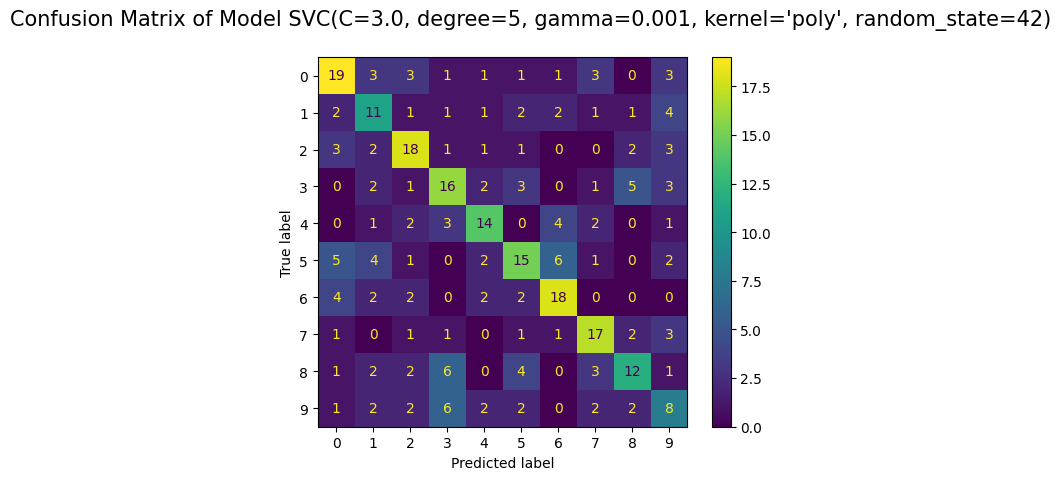

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test2, predicted2)
disp.figure_.suptitle(f"Confusion Matrix of Model {clf2}",fontsize = 15)
print(f"Confusion matrix of SVM:\n{disp.confusion_matrix}\n")

plt.grid(False)
plt.show()

#7 NHẬN XÉT

### Sự khác nhau giữa kết quả dự đoán của mô hình và nhãn trong tập Test sau khi train model bằng Decision Tree

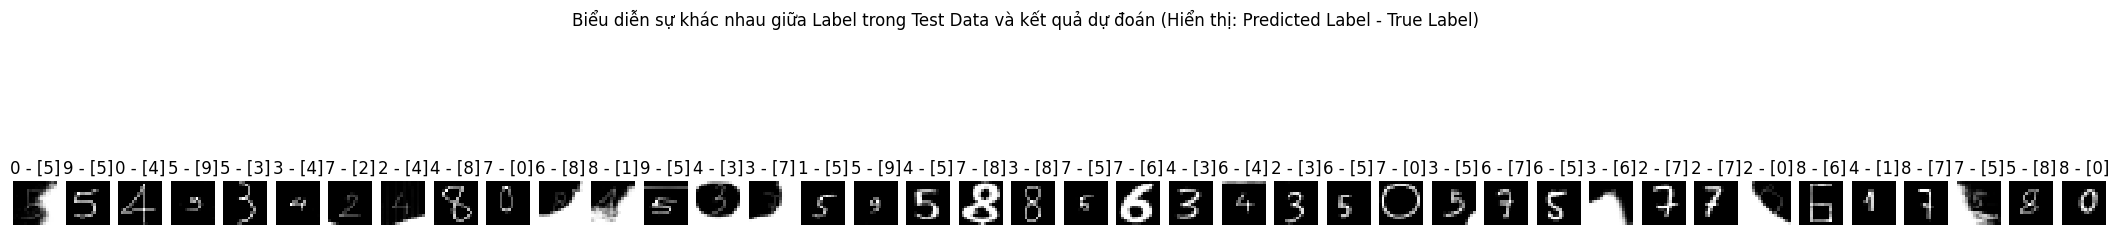

In [ ]:
diff_list = list()
for  image, prediction, target in zip(X_test, predicted1, y_test):
    #ax.set_axis_off()
    if prediction != target:
      #print (prediction,'-',target)
      diff_list.append ([image,prediction,target])

_, axes = plt.subplots(nrows=1, ncols=40, figsize=(27, 4))
for ax,image in zip (axes,diff_list[:40]):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Hiển thị: Predicted Label - True Label)", fontsize=12)
plt.show()

In [ ]:
print ("Số lượng mẫu được dự đoán lệch với nhãn:",len(diff_list))
print ("Số lượng mẫu được dự đoán đúng với nhãn:",y_test.shape[0]-len(diff_list))

Số lượng mẫu được dự đoán lệch với nhãn: 171
Số lượng mẫu được dự đoán đúng với nhãn: 132


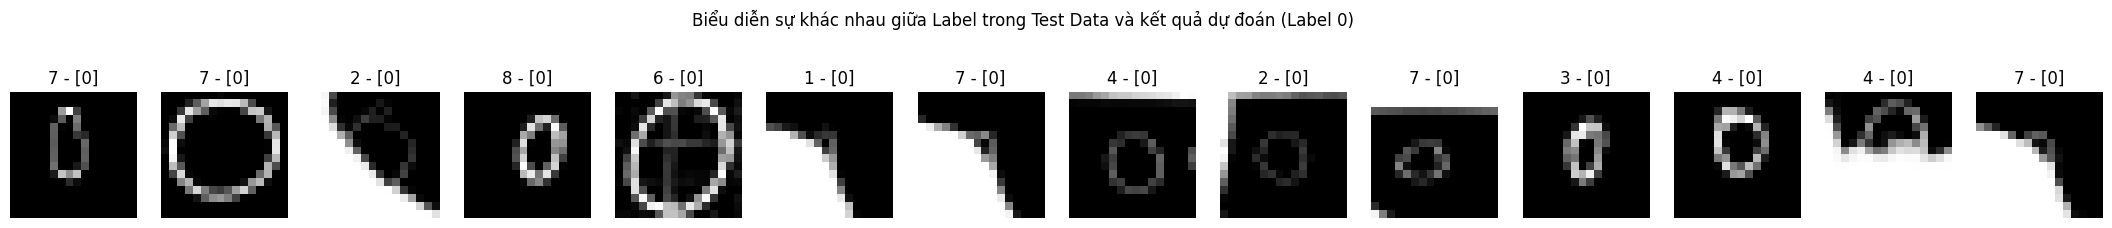

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 0 and image[1] != 0:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(27, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 0)", fontsize=12)
plt.show()

- Đối với nhãn 0, tỉ lệ precision cao nhất (0.7), cho thấy trong các mẫu dự đoán số 0 thì tỉ lệ chính xác khá tốt.
- Các mẫu đoán nhầm của mô hình có đủ các số từ 1, 3, 4, 6, 7, 8, trong đó nhiều nhất là số 7 (5 mẫu), 4 (3 mẫu).
  --> Recall của label 0 đạt 0.6
- Có các mẫu sau khi tiền xử lý đã không còn nhận diện được chữ số.
- Trong các mẫu còn lại, số 0 thường bị đoán nhầm thành số 7 và 4.

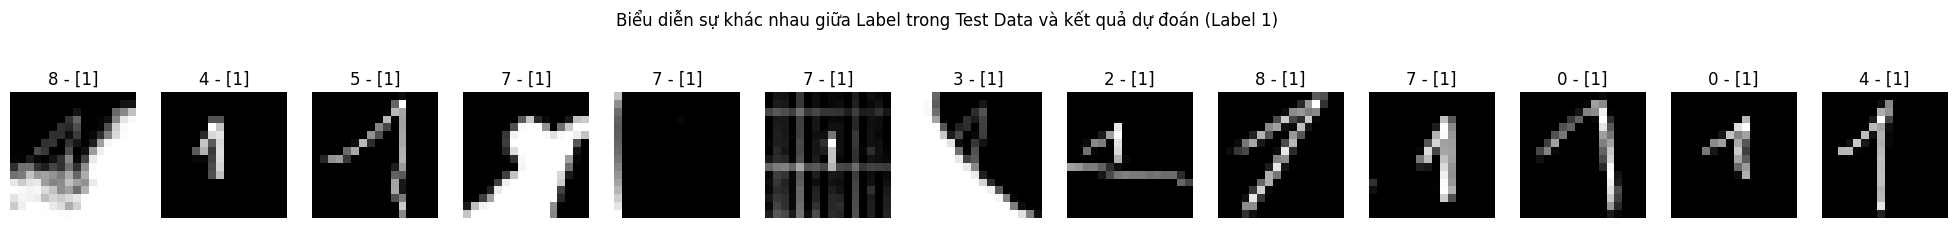

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 1 and image[1] != 1:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 1)", fontsize=12)
plt.show()

- Đối với nhãn 1, tỉ lệ precision ~0.46 (13/28), số lượng mẫu đoán đúng nhãn 1 là 13 mẫu.
- Các mẫu của nhãn này được mô hình dự đoán thành nhiều số khác nhau (0, 2, 3, 4, 5, 7, 8), trong đó nhiều nhất là số 7 (4/26).
- Có 3/4 mẫu mô hình dự đoán là số 7 đã không thể nhận diện như bình thường.
- Trong các mẫu nhận diện được bằng mắt thường thì mô hình dự đoán thành 0, 4 là nhiều nhất với 2 mẫu. Đặc điểm chữ số 1 trong 2 mẫu dự đoán thành 4 có thể dễ nhầm lẫn thành số 4.

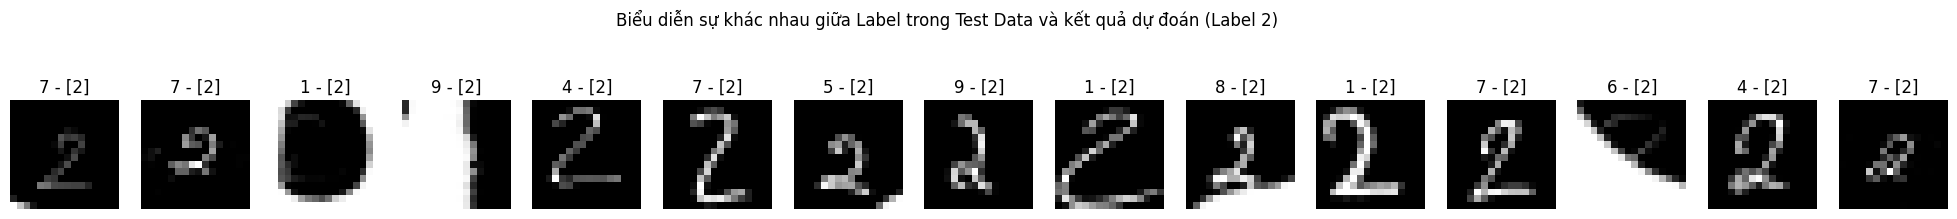

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 2 and image[1] != 2:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 2)", fontsize=12)
plt.show()

- Đối với nhãn 2, tỉ lệ precision là 0.48 (16/33)
- Tỉ lệ Recall đạt 0.52, các mẫu của nhãn này được mô hình dự đoán thành nhiều số khác nhau từ 1, 2, 4, 5, 6, 7, 8, 9, trong đó dự đoán nhầm nhiều nhất thành số 7 (5/31) và số 1 (3/31).
- Ở các mẫu dự đoán thành số 7, có thể thấy số 2 được viết có sự tương đồng với số 7 ở nét ngang trên cùng và nét dọc.


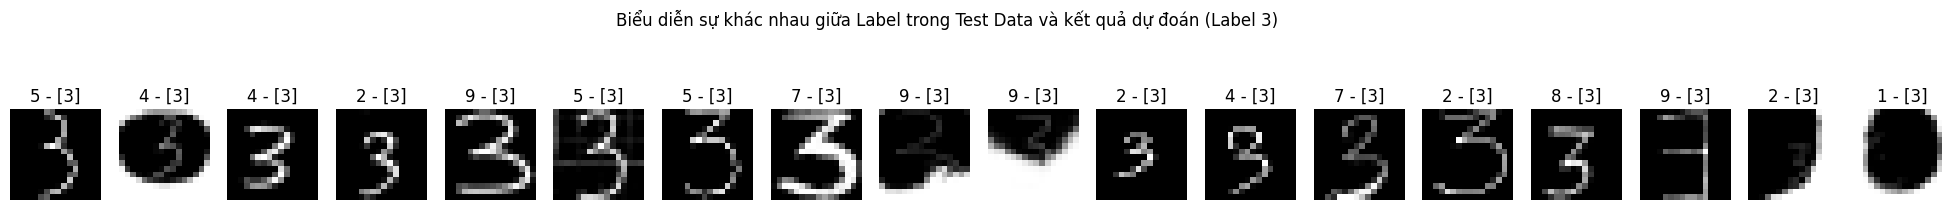

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 3 and image[1] != 3:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 3)", fontsize=12)
plt.show()

- Đối với nhãn 3, tỉ lệ precision là 0.56 (15/27)
- Tỉ lệ Recall đạt 0.45, các mẫu của nhãn này được mô hình dự đoán thành nhiều số khác nhau từ 1, 2, 3, 4, 5, 7, 8, 9, trong đó dự đoán nhầm nhiều nhất thành số 2, 9 (4/31) và số 4, 5 (3/31).
- Ở các mẫu nhận diện được bằng mắt thường, mẫu của nhãn 3 bị nhầm lẫn thành 9 (2 mẫu), 5 (3 mẫu).  

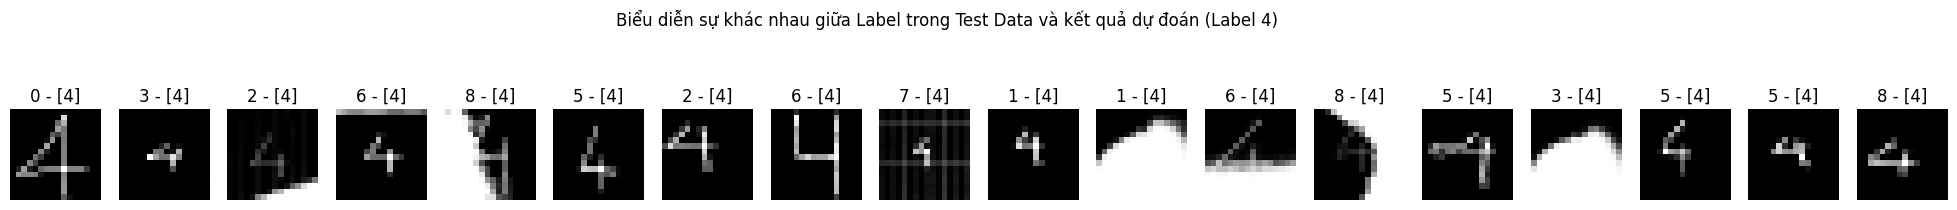

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 4 and image[1] != 4:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 4)", fontsize=12)
plt.show()

- Với nhãn 4, tỉ lệ Precision là 0.23 (thấp nhất trong các label), cho thấy nhiều mẫu từ nhiều nhãn khác nhau dự đoán thành số 4, chỉ có 9 mẫu đúng (trong tổng 39 mẫu).
- Tỉ lệ Recall là 0.33. Nhiều mẫu số 4 đã bị mô hình dự đoán thành các số từ 1 đến 8, trong đó dự đoán nhầm nhiều nhất là số 5 (4/27), 6, 8 (3/27)

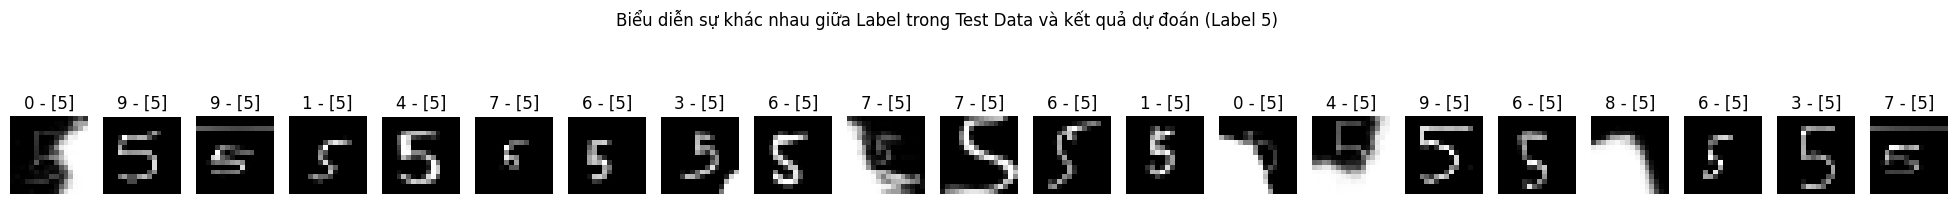

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 5 and image[1] != 5:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 3))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 5)", fontsize=12)
plt.show()

- Với nhãn 5, tỉ lệ Precision là 0.45 (15/33), nhiều mẫu từ nhiều mẫu khác nhau từ 1, 2, 3, 4, 6, 8, 9 dự đoán thành số 5
- Tỉ lệ Recall là 0.42, trong đó có số 6 (5 mẫu) và 7 (4 mẫu) là 2 số bị mô hình dự đoán nhầm nhiều nhất.
- Dễ thấy đặc điểm trong các mẫu số 5 bị dự đoán nhầm thành 6 thì đặc điểm viết số 5 gần giống với 6, tương tự với mẫu dự đoán nhầm thành 7 và 9

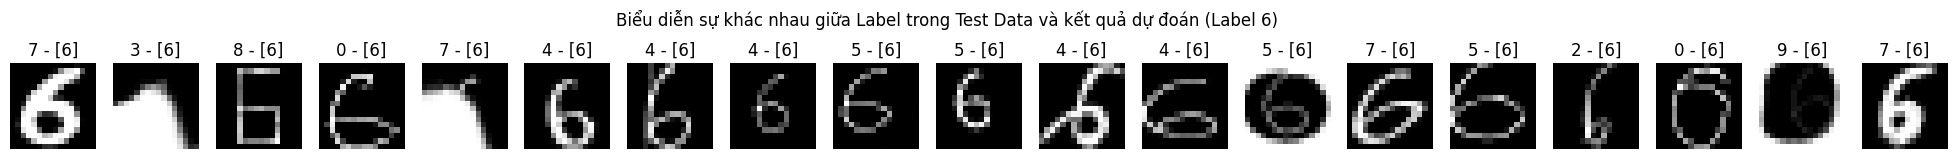

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 6 and image[1] != 6:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 2))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 6)", fontsize=12)
plt.show()

- Với nhãn 6, tỉ lệ Precision là 0.46 (11/24), nhiều mẫu từ nhiều mẫu khác nhau từ 0, 2, 4, 5, 6, 7 dự đoán thành số 6
- Tỉ lệ Recall của nhãn 6 thấp, 0.37, trong đó có số 4 (5 mẫu) và 5, 7 (4 mẫu) là 2 số bị mô hình dự đoán nhầm nhiều nhất.


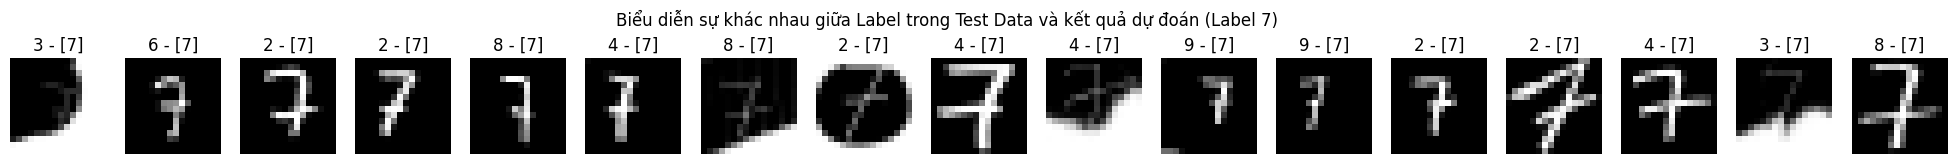

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 7 and image[1] != 7:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 2))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 7)", fontsize=12)
plt.show()

- Với nhãn 7, tỉ lệ Precision ở mức thấp là 0.25 (10/40), nhiều mẫu từ nhiều mẫu khác nhau từ 0 đến 9.
- Tỉ lệ Recall của nhãn 7 thấp, 0.37, trong đó có số 2 (5 mẫu) và 4 (4 mẫu) là 2 số bị mô hình dự đoán nhầm nhiều nhất.
- Có 5 mẫu sau tiền đã xử lý đã khó nhận diện được bằng mắt thường.
- Trong các mẫu có thể nhận diện được, số 2 là dễ nhầm nhất do có đặc điểm viết khá gần với số 7.

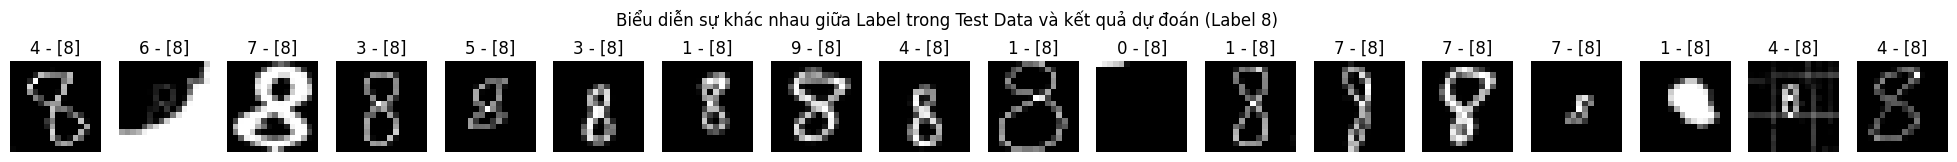

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 8 and image[1] != 8:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 2))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 8)", fontsize=12)
plt.show()

- Với nhãn 8, tỉ lệ Precision là 0.48 (13/27), nhiều mẫu từ nhiều mẫu khác nhau từ 0 đến 9.
- Tỉ lệ Recall của nhãn 8 là 0.42, trong đó số 1, 4, 7 là các số được mô hình dự đoán cho các mẫu của nhãn 8 là nhiều nhất (4 mẫu / 31 mẫu)

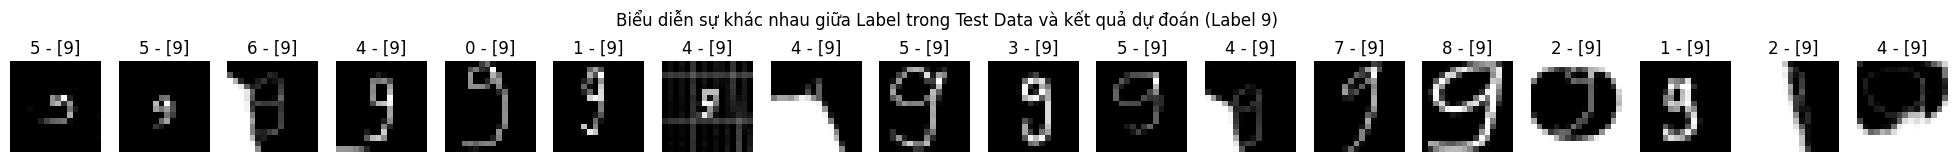

In [ ]:
image0 = []
for image in diff_list:
  if image[2] == 9 and image[1] != 9:
    image0.append (image)

_, axes = plt.subplots(nrows=1, ncols=len(image0), figsize=(25, 2))
for ax,image in zip (axes,image0):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Label 9)", fontsize=12)
plt.show()

- Với nhãn 9, tỉ lệ Precision là 0.41 (9/22), nhiều mẫu từ nhiều mẫu khác nhau từ các số 2, 3, 5, 6, 7, 8, 9.
- Tỉ lệ Recall của nhãn 9 ở mức thấp là 0.33, trong đó số 4 (5 mẫu), 5 (4 mẫu) là các số có số mẫu được mô hình dự đoán từ mẫu của nhãn 9 thành các số trên.

**Nhận xét mô hình dùng Decision Tree:**
- Số mẫu nhận diện đúng là 132/303 ~ 0.44
- Macro Precision: ~0.43
- Macro Recall: ~0.45
- Macro F1-score: ~0.44
1. Một số mẫu sau khi tiền xử lý, bằng mắt thường, đã không thể nhận diện được chữ số được viết trong mẫu (khi greyscale, resize thì mẫu đã bị cắt bớt hoặc chuyển thành nền trắng. Bên cạnh đó, do chữ số viết mờ nên khi greyscale thì chữ số không thể nhận diện được). Vì thế, dễ hiểu mô hình đã không thể nhận diện đúng các mẫu này.
2. Đa phần, mô hình dự đoán nhầm các số thuộc một mẫu thành nhiều chữ số khác nhau, thậm chí với các mẫu của một loại chữ số mà mô hình có thể dự đoán từ 6 đến 10/10 chữ số khác nhau của các mẫu này.  
  --> Dẫn đến, tỉ lệ Recall của các số đạt mức trung bình thấp (đều dưới 0.6)
3. Các số trong mẫu có một số cách viết tương đồng với số khác làm mô hình dễ bị nhiễu và dự đoán không chính xác.
4. Do sự hạn chế của mô hình, mặc dù đã có tinh chỉnh, các mẫu có chữ số viết rõ ràng nhưng vẫn dự đoán sai thành các số khác. Nhóm vẫn đang tìm hiểu và tìm cách khắc phục trường hợp này.

### Sự khác nhau giữa kết quả dự đoán của mô hình và nhãn trong tập Test sau khi train model bằng SVM

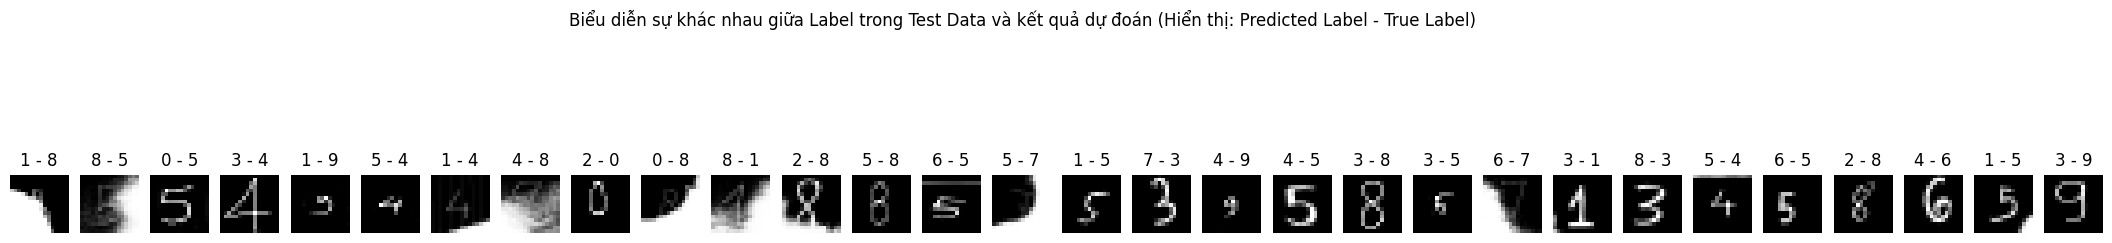

In [ ]:
diff_list2 = list()
for  image, prediction, target in zip(X_test, predicted2, y_test2):
    #ax.set_axis_off()
    if prediction != target:
      #print (prediction,'-',target)
      diff_list2.append ([image,prediction,target])

_, axes = plt.subplots(nrows=1, ncols=30, figsize=(27, 4))
for ax,image in zip (axes,diff_list2[:30]):
    ax.set_axis_off()
    img = image[0].reshape(16, 16)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{image[1]} - {image[2]}")

_.suptitle("Biểu diễn sự khác nhau giữa Label trong Test Data và kết quả dự đoán (Hiển thị: Predicted Label - True Label)", fontsize=12)
plt.show()

In [ ]:
print ("Số lượng mẫu được dự đoán lệch với nhãn:",len(diff_list2))
print ("Số lượng mẫu được dự đoán đúng với nhãn:",y_test2.shape[0]-len(diff_list2))

Số lượng mẫu được dự đoán lệch với nhãn: 161
Số lượng mẫu được dự đoán đúng với nhãn: 142


**Nhận xét mô hình dùng SVM:**
- Số mẫu nhận diện đúng là 142/303 ~ 0.49
- Macro Precision: ~0.49
- Macro Recall: ~0.49
- Macro F1-score: ~0.49

So sánh với Decision Tree, độ chính xác của mô hình cao hơn. Có thể nhận ra trên đường chéo chính của Confusion Matrix, số lượng mẫu dự đoán đúng với label của nó nhìn chung là nhiều hơn so với mô hình dùng Decision Tree.

Về các con số tổng quát thì mô hình dùng SVM phản ánh kết quả tốt hơn, nhưng nếu nhìn chi tiết, trên lệch không quá nhiều so với Decision Tree.
- Label 0, 1, 3, 9  thì cả Precision, Recall, F1-score thấp hơn.
- Nhưng Label 2, 4, 5, 6, 7, 8 thì SVM có 3 chỉ số trên cao hơn.


Tuy nhiên, khi nhìn xung quanh, đối với 1 nhãn, mô hình vẫn cho ra nhiều kết quả khác nhau đối với các mẫu của cùng 1 nhãn (dao động từ 6 đến 10 nhãn dự đoán) hay số lượng dự đoán của mô hình về một số nào đó sẽ gồm có nhiều mẫu của nhiều nhãn khác nhau.
  --> Cho thấy mô hình vẫn có xư hướng dự đoán "hỗn loạn", khó theo một quy luật nhất định. Chất lượng phân loại vẫn mức trung bình.

Cho thấy so với Decision Tree, SVM chỉ cải thiện hơn ở mức cho ra kết quả ở một số label là tốt hơn chứ chưa đưa ra cải thiện chất lượng phân loại quá nhiều so với Decision Tree.

###**KẾT LUẬN**
- Một số hình sau khi tiền xử lý đã không thể nhận diện được chữ số, vì thế mô hình vẫn còn nhạy cảm với hình ảnh có nét chữ mờ, điều kiện ánh sáng chưa tốt, chụp hình vẫn còn nhiễu,..., đây là các điều kiện khách quan từ bên cung cấp dữ liệu. Do đó, cần có khâu tiền xử lý khác để cải thiện chất lượng dữ liệu nhưng với kiến thức tìm hiểu được của nhóm thì vẫn chưa thể cải tiến thêm phần tiền xử lý này.
- Bên cạnh đó, cần có bước chuẩn bị dữ liệu tốt hơn để bao quát các trường hợp mà dataset có (các điều kiện khách quan khác nhau của bên cung cấp dữ liệu).
- Nhóm mới chỉ thực hiện trên 2 thuật toán SVM và Decision Tree với các tinh chỉnh đơn giản, cần thử nghiệm nhiều công cụ thuật toán khác và cần các bước tinh chỉnh khác hơn để cải thiện đầu ra cho mô hình.
- Mô hình vẫn còn dự đoán sai các trường hợp chữ viết tay có hình ảnh sau khi tiền xử lý và nét chữ rõ ràng. Nhóm vẫn đang tìm nguyên nhân cho trường hợp này, dự đoán nguyên nhân có thể do dữ liệu train chưa đủ bao quát các trường hợp trong test nên vẫn còn dự đoán sai các mẫu rõ ràng như vậy.


  
